In [1]:
from sklearn.decomposition import PCA
from glob import glob
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import warnings
from astropy.utils.exceptions import AstropyUserWarning

warnings.filterwarnings("ignore", category=AstropyUserWarning)
%matplotlib inline

In [2]:
H_dict = np.load("histogram_edges_lb_smallmask300.npz")

In [3]:
H_array = H_dict["H_array"]

In [4]:
xedges = H_dict["xedges"]

In [5]:
yedges = H_dict["yedges"]

In [6]:
pointings_avg = H_dict["pointings_avg"]

In [7]:
xedges.shape

(300,)

In [8]:
const = 300
x_min,x_max = 0,4
y_min,y_max = 9, 20

In [9]:
bin_number = int(np.sqrt(H_array.shape[1]))
print (bin_number)

300


In [10]:
pca = PCA(n_components=20, whiten=False)
#pca.fit(H_array)
pca.fit(np.log(H_array + const))

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

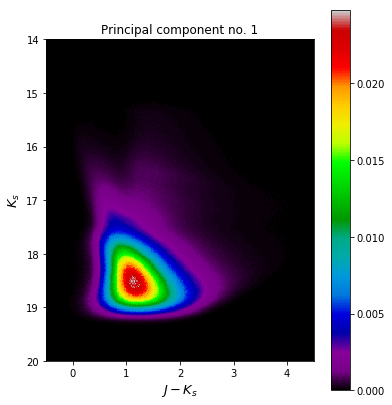

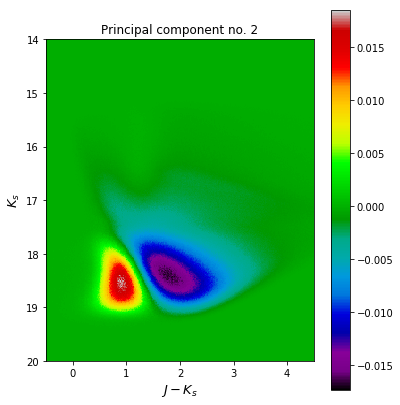

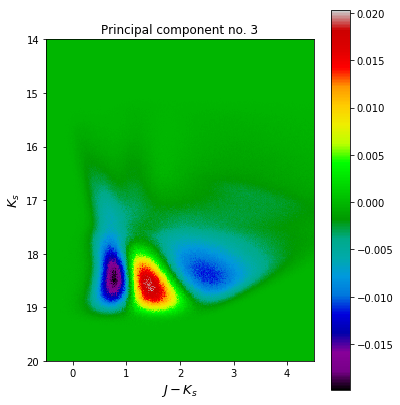

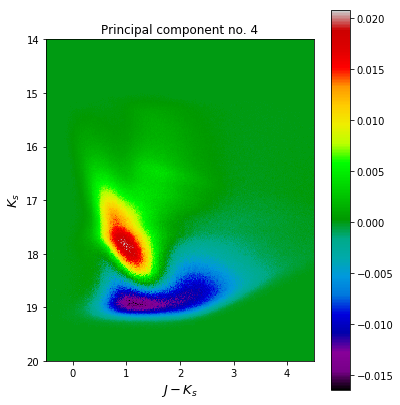

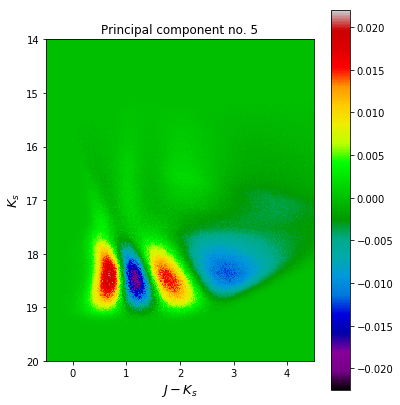

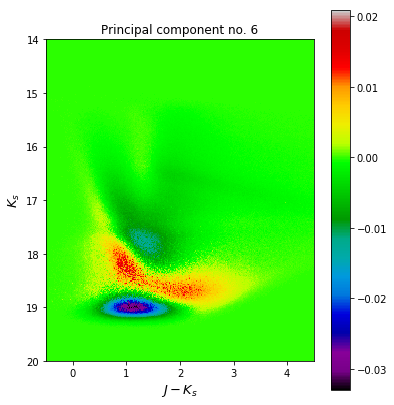

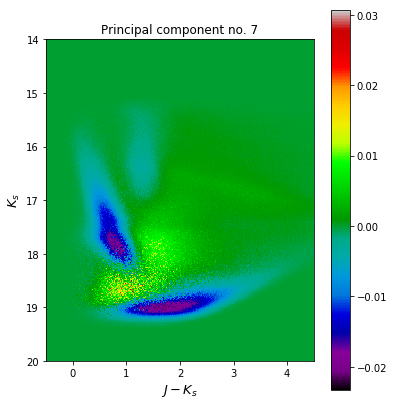

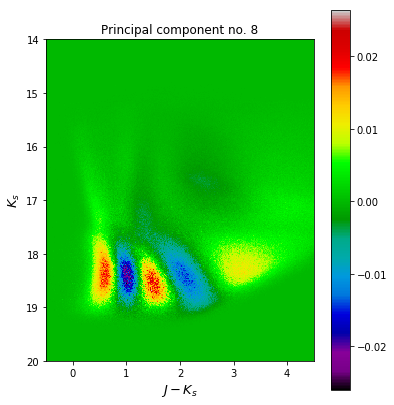

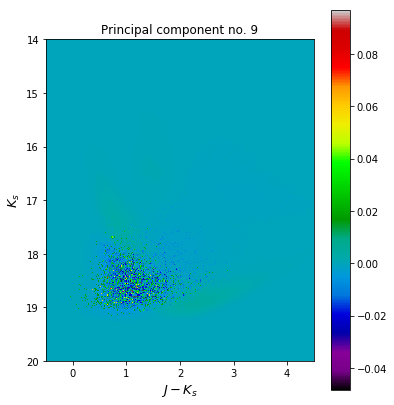

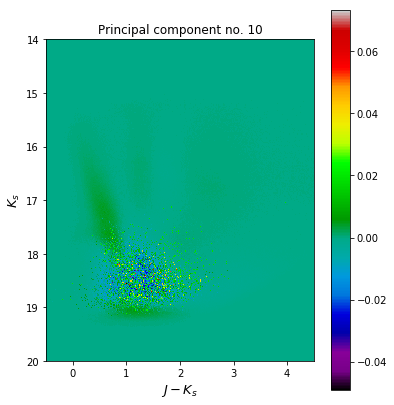

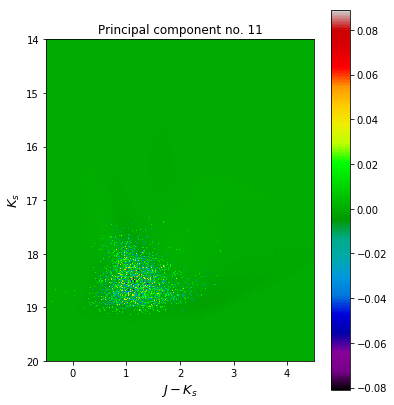

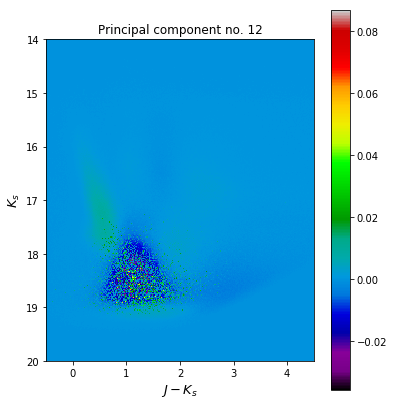

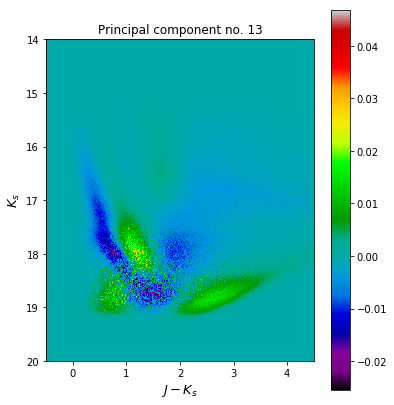

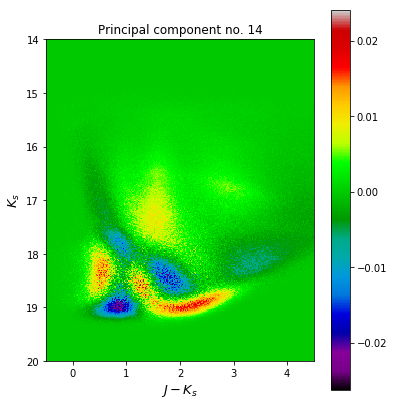

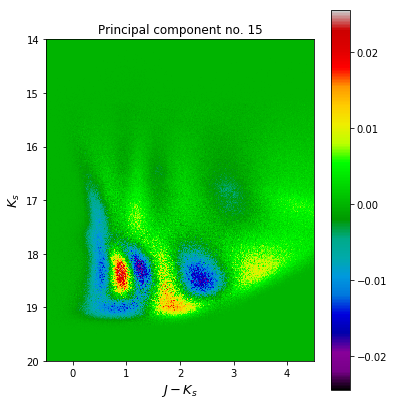

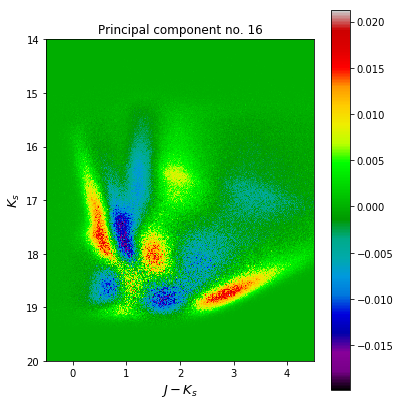

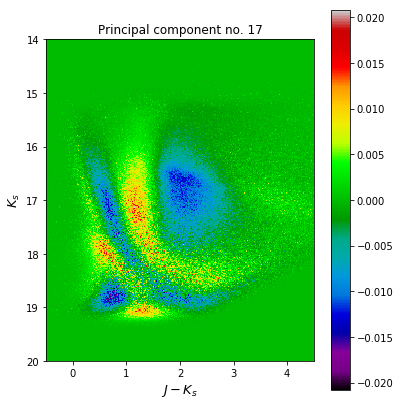

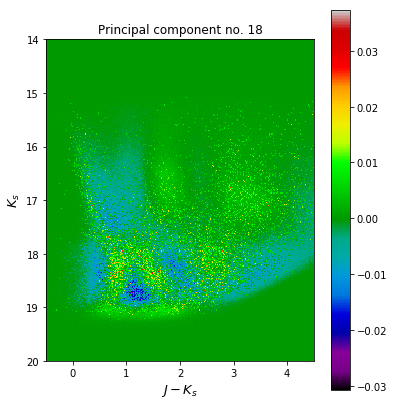

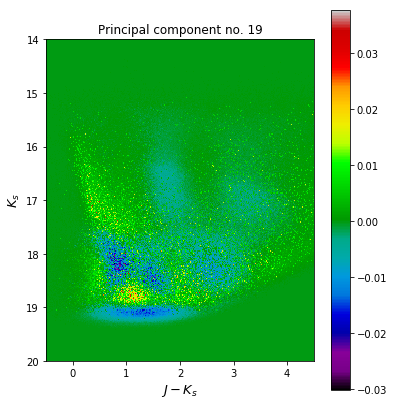

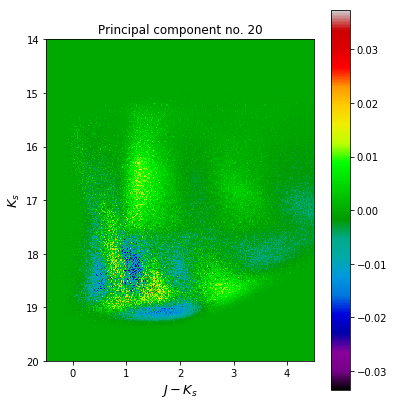

In [11]:
savename = "pc_plots_drive_%d_%d.png"
blocknumber = 10
for i in range(20):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,7),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    cax = ax.imshow(pc.T, cmap='nipy_spectral', interpolation='none', extent=[x_min-0.5,x_max+0.5,y_max,y_min+5])
    ax.set_title('Principal component no. %d' %(i+1) )
    cbar = fig.colorbar(cax)
    plt.xlabel("$J-K_{s}$",fontsize=13)
    plt.ylabel("$K_{s}$",fontsize=13)
    #fig.savefig(savename % (blocknumber, i))

In [12]:
pc.T.shape

(300, 300)

In [13]:
H_small = pca.fit_transform(H_array)

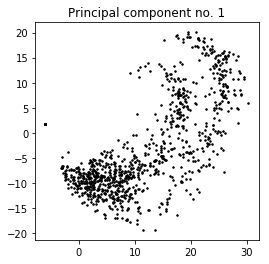

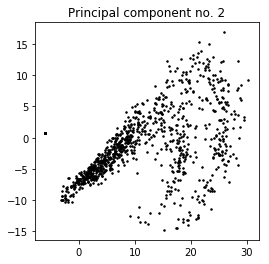

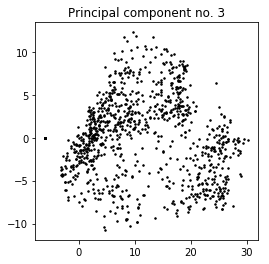

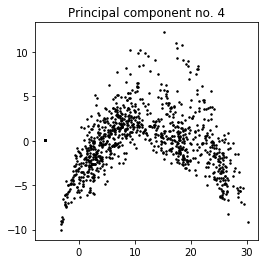

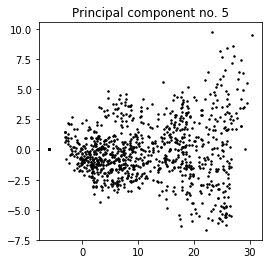

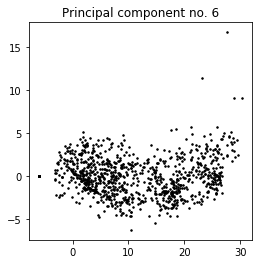

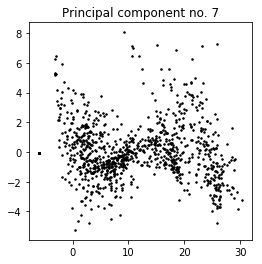

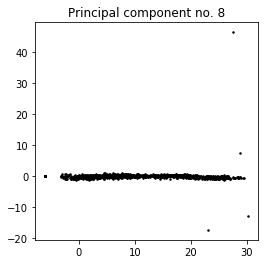

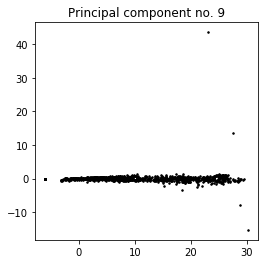

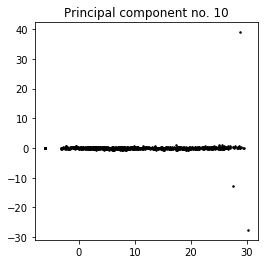

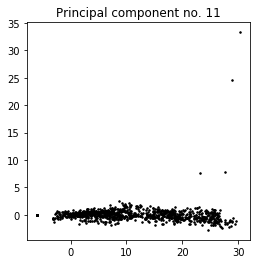

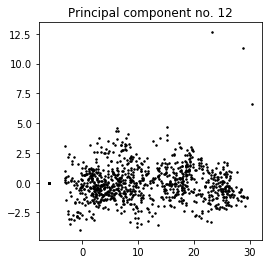

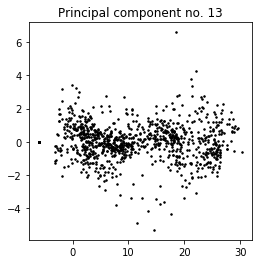

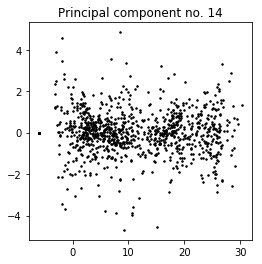

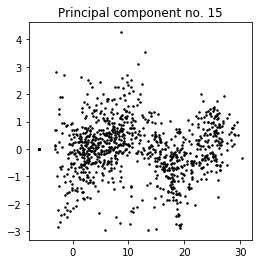

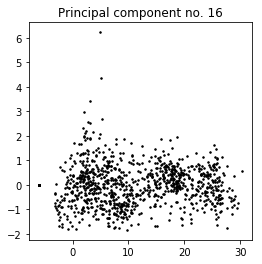

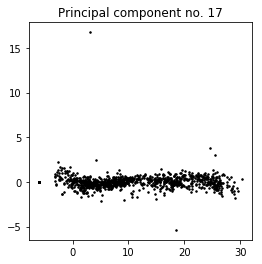

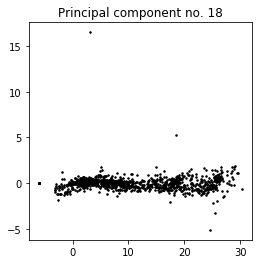

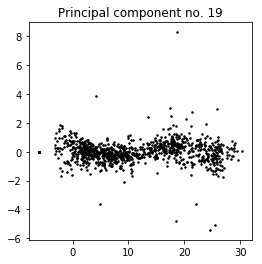

In [14]:
savename = "pc_drive_%d_%d.png"
for i in np.arange(1,20):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    ax.plot(H_small[:,0], H_small[:,i], 'k.', ms=3.)
    ax.set_title('Principal component no. %d' %(i) )
    #fig.savefig(savename % (blocknumber, i+1))

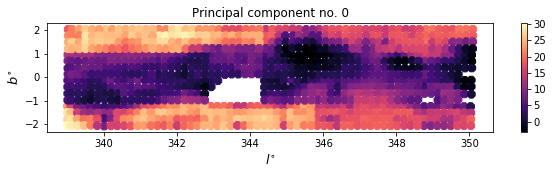

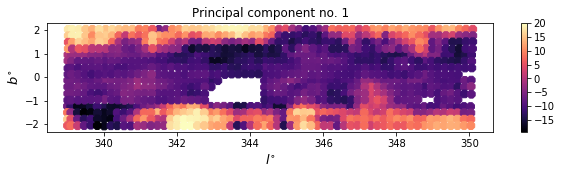

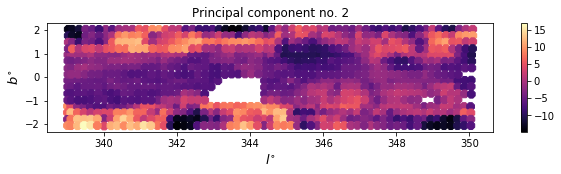

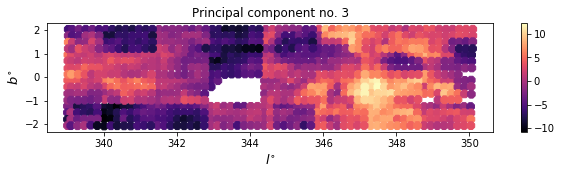

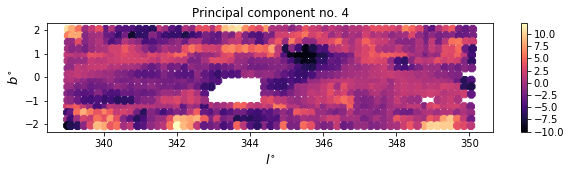

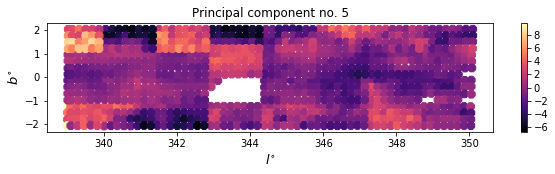

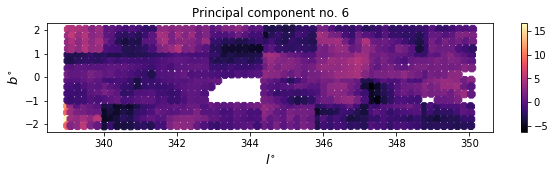

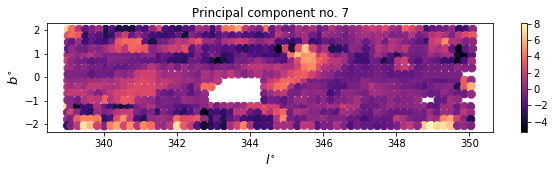

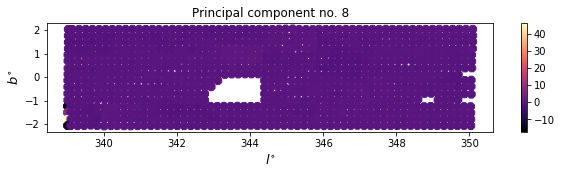

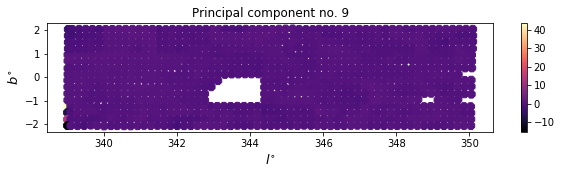

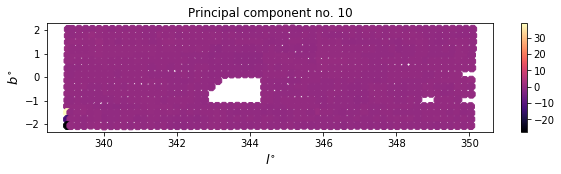

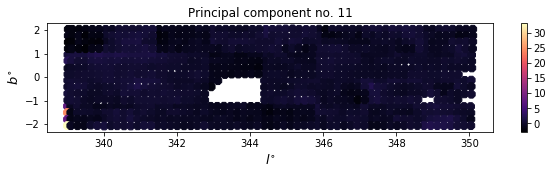

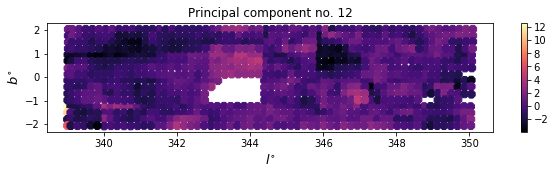

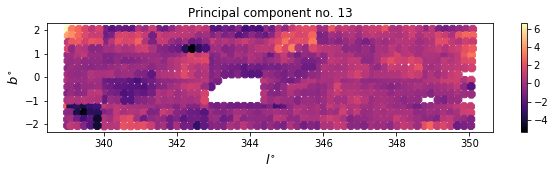

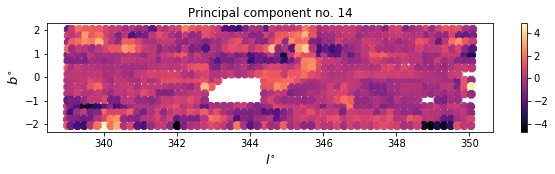

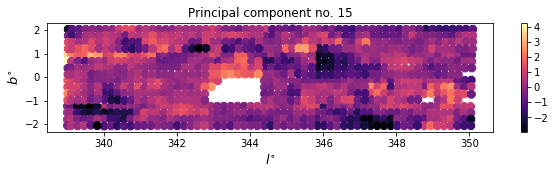

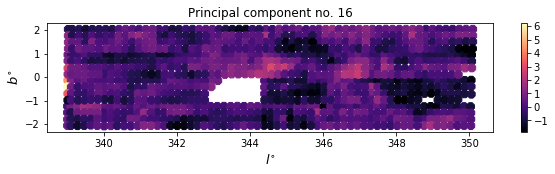

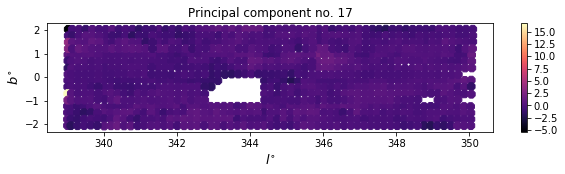

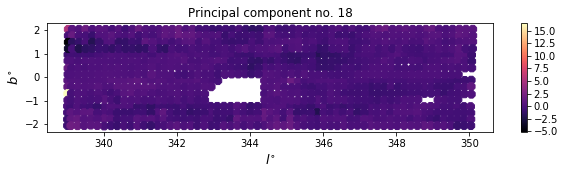

In [15]:
for i in np.arange(0,19):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,2),facecolor='w',edgecolor='k')
    plt.scatter(pointings_avg[:,0], pointings_avg[:,1], c=H_small[:,i], cmap='magma', marker='8',s=70);
    plt.colorbar()
    ax.set_title('Principal component no. %d' %(i) )
    plt.xlabel("$l ^{\circ}$",fontsize=13)
    plt.ylabel("$b ^{\circ}$",fontsize=13)
    #plt.savefig("PC_galactic_l_b_%d.png" %i)

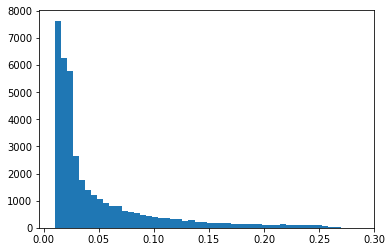

In [16]:
stddev = H_array.std(axis=0)
stddev = stddev[stddev>0.01]
xedges, yedges, patch = plt.hist(stddev, bins=50)

In [17]:
# Creating a mask using the second principal component and re-fitting
mask = (H_small[:,16] < 2.5) & (H_small[:,16]>-2.) & (H_small[:,6] < 7.)

#pca.fit(H_array[mask])
pca.fit(np.log(H_array[mask] + const))
H_small_mask = pca.fit_transform(H_array[mask])

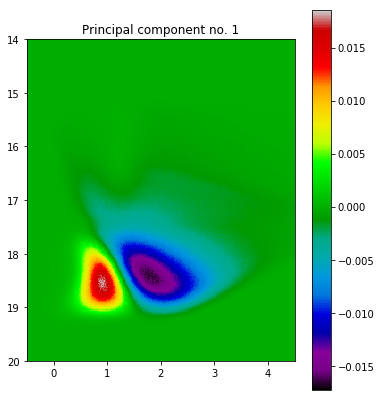

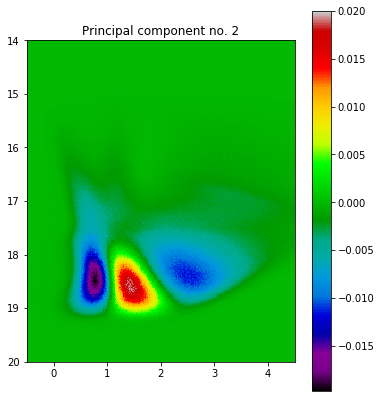

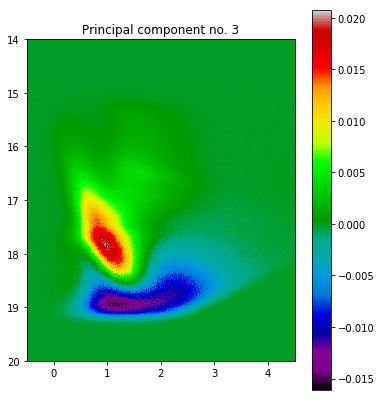

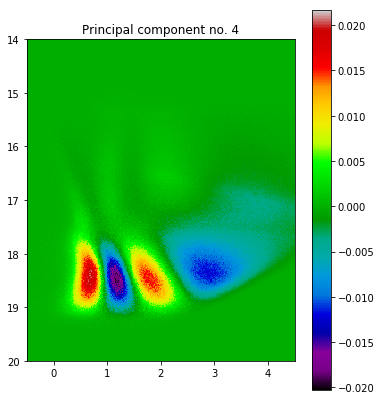

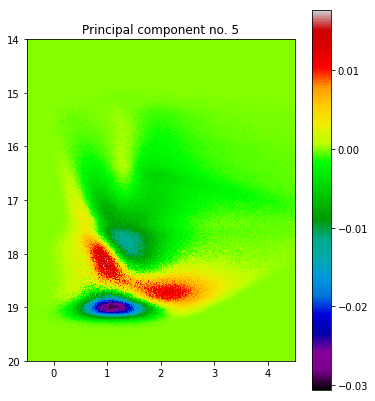

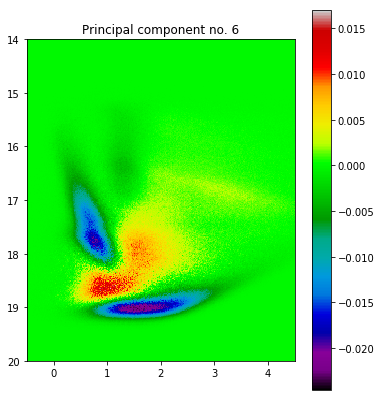

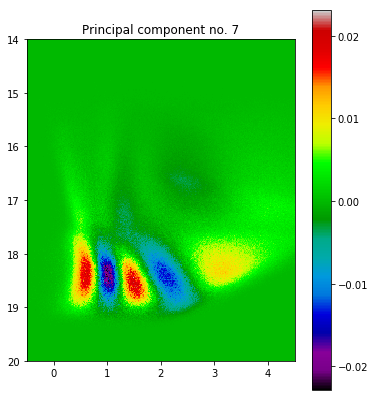

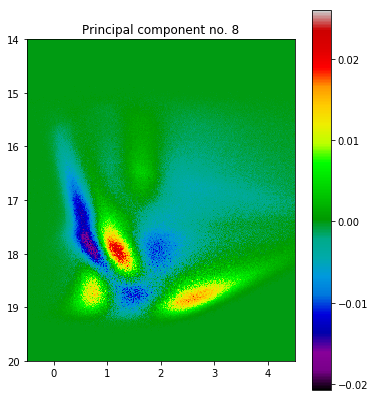

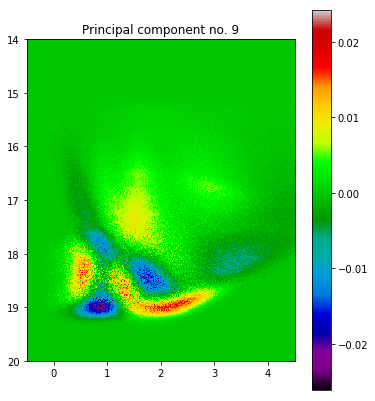

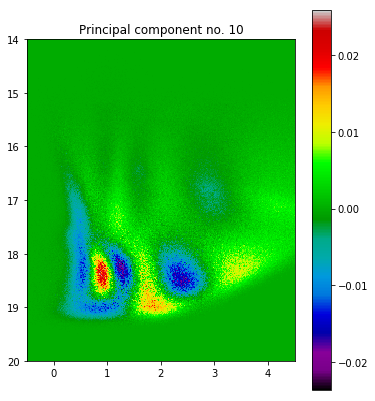

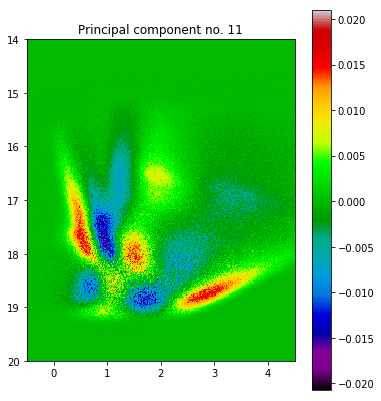

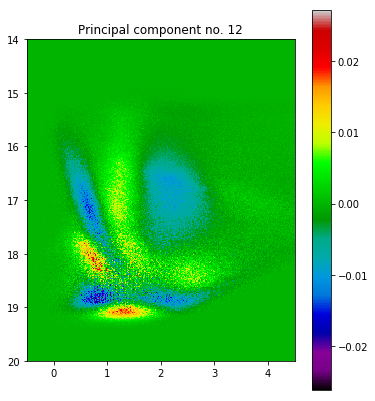

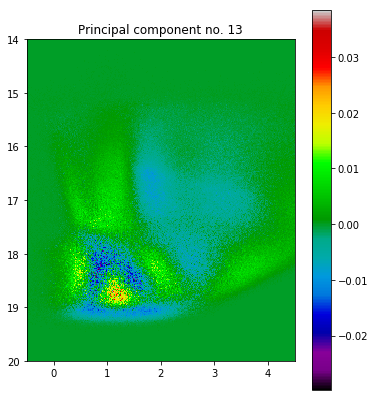

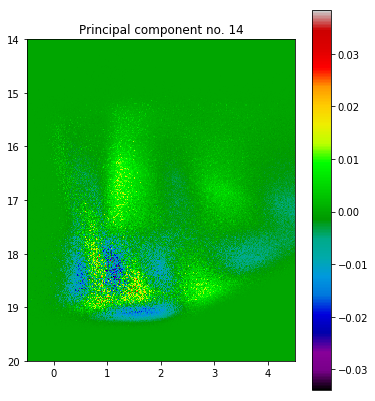

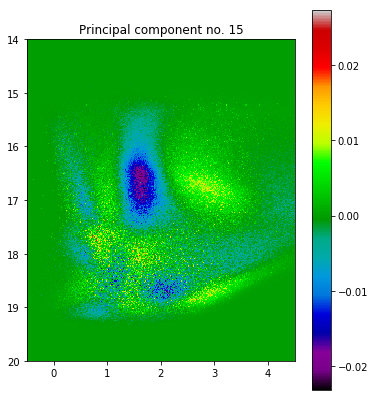

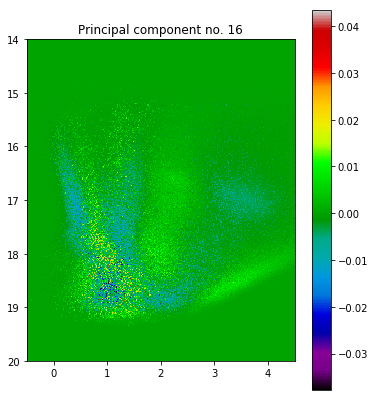

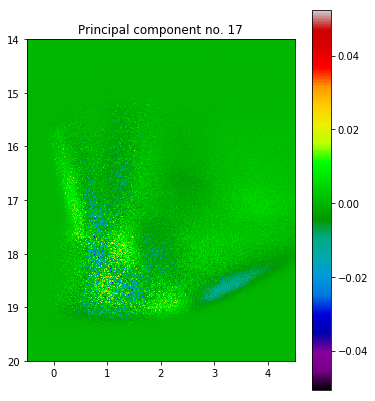

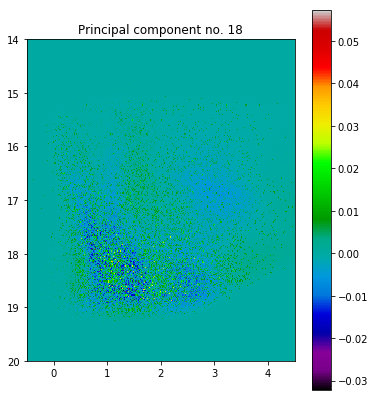

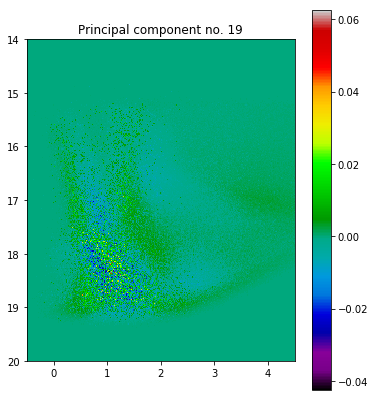

In [18]:
savename = "pc_plots_drive_%d_%d_masked.png"
blocknumber = 10
for i in np.arange(1,20):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,7),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    cax = ax.imshow(pc.T, cmap='nipy_spectral', interpolation='none', extent=[x_min-0.5,x_max+0.5,y_max,y_min+5])
    ax.set_title('Principal component no. %d' %(i) )
    cbar = fig.colorbar(cax)
    #fig.savefig(savename % (blocknumber, i))

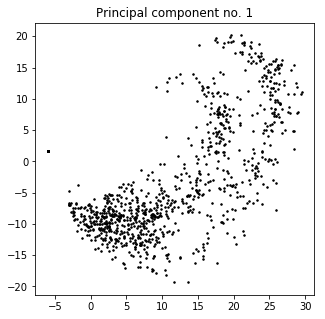

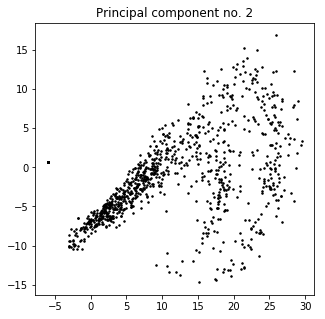

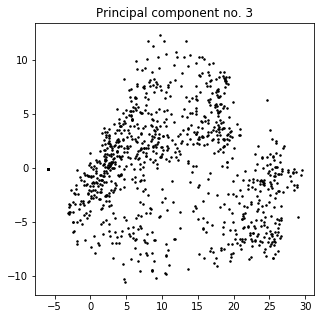

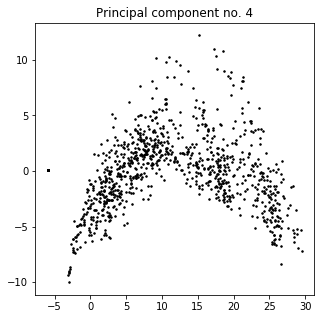

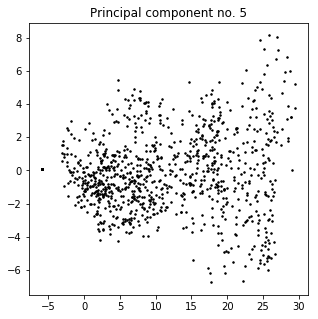

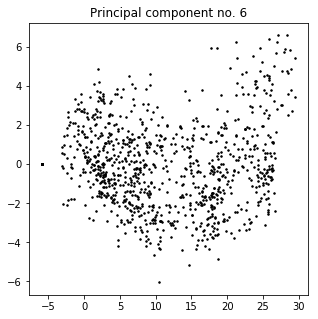

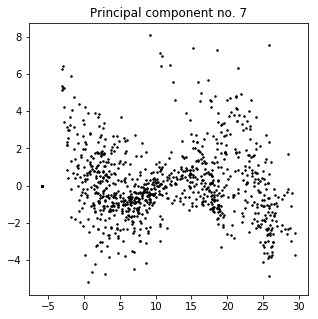

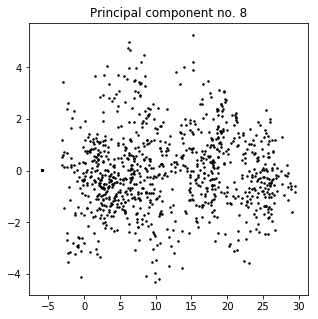

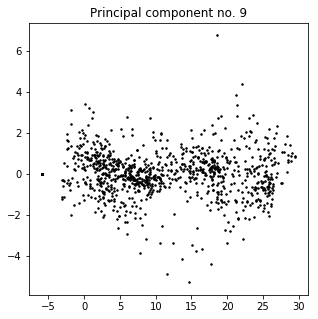

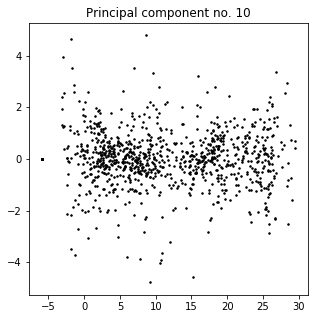

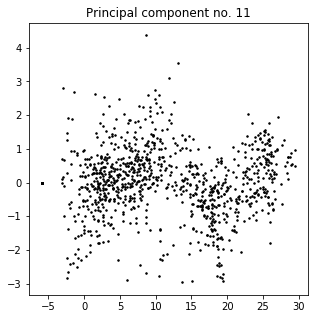

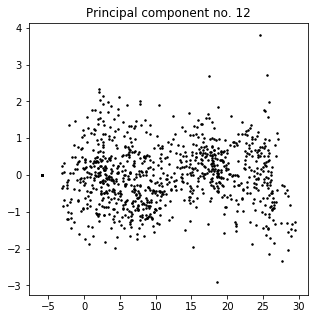

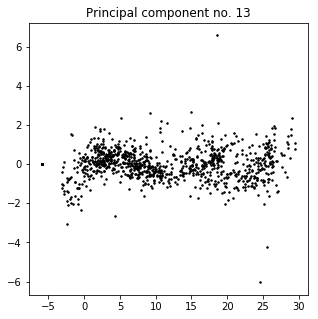

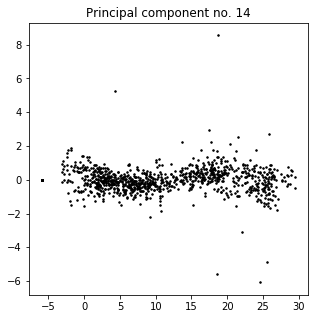

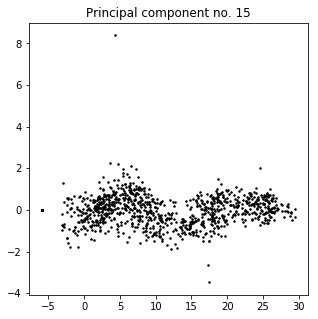

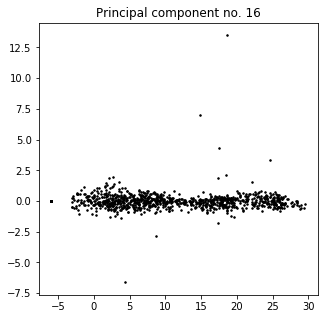

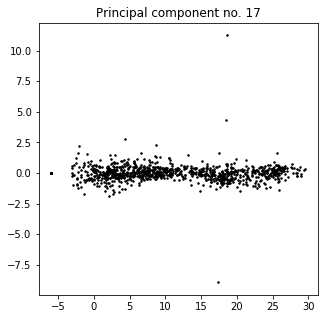

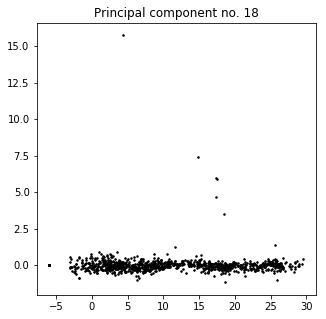

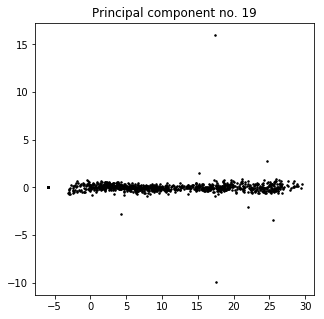

In [19]:
for i in np.arange(1,20):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5),facecolor='w',edgecolor='k')
    pc = pca.components_[i]
    pc = pc.reshape((bin_number,bin_number))
    ax.plot(H_small_mask[:,0], H_small_mask[:,i], 'k.', ms=3.)
    ax.set_title('Principal component no. %d' %(i) )

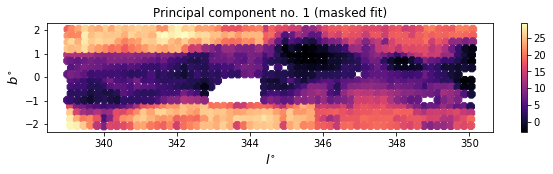

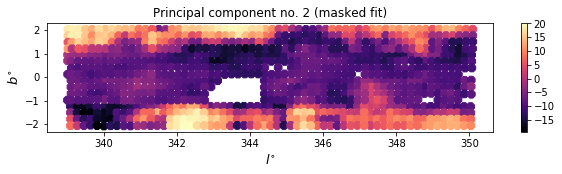

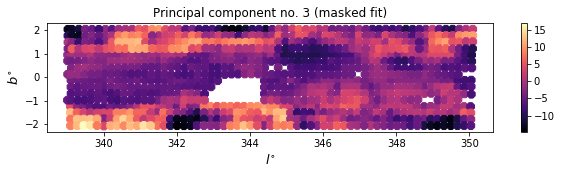

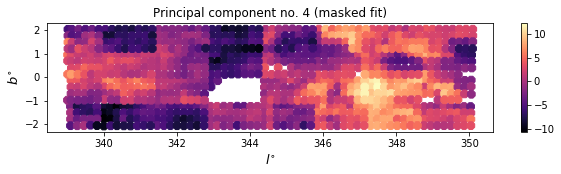

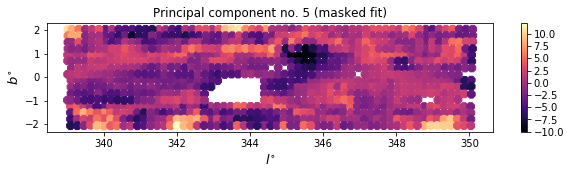

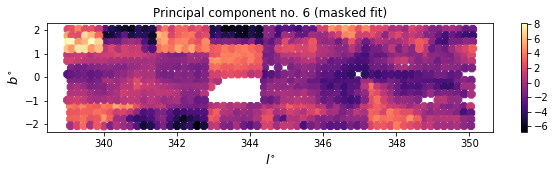

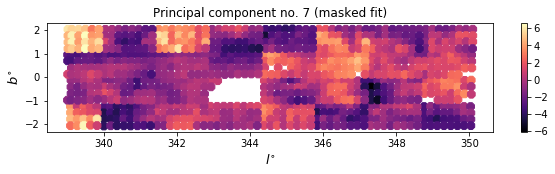

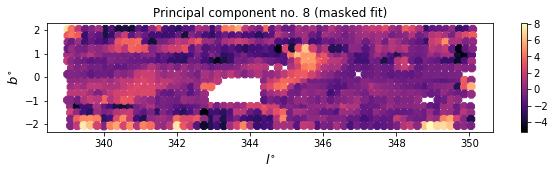

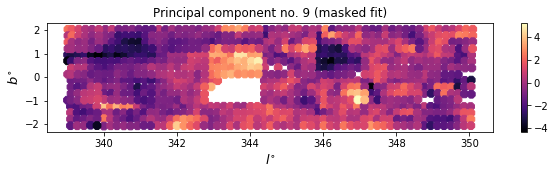

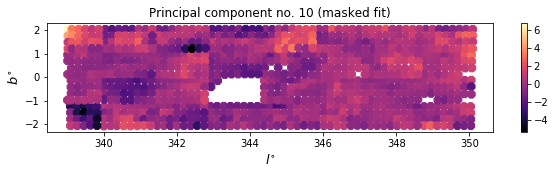

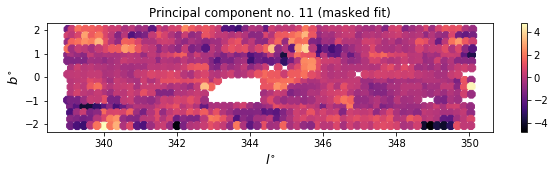

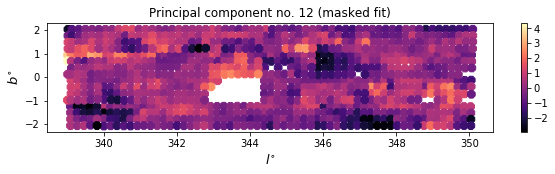

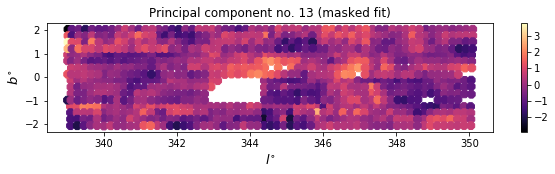

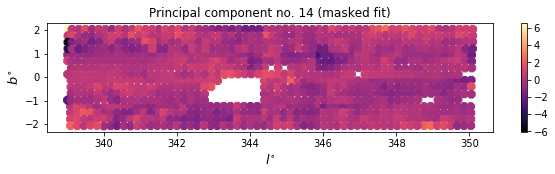

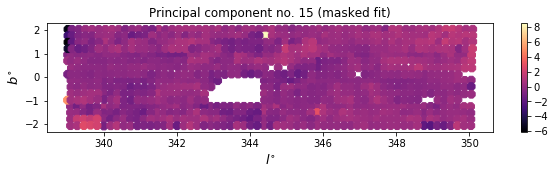

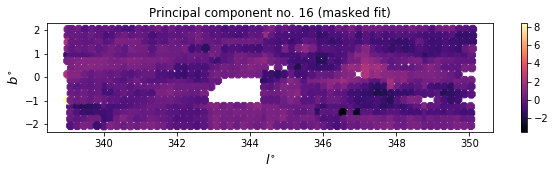

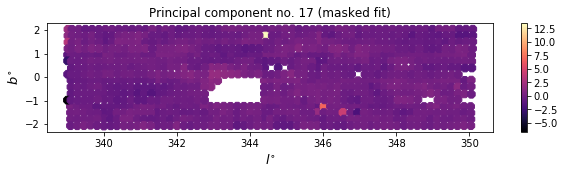

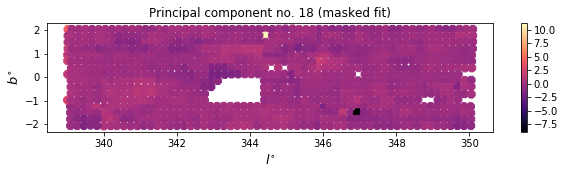

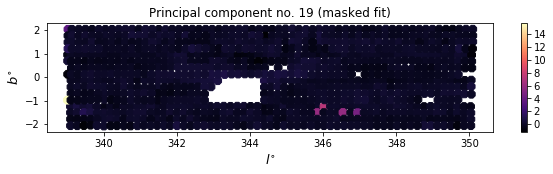

In [20]:
for i in np.arange(0,19):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,2),facecolor='w',edgecolor='k')
    plt.scatter(pointings_avg[mask,0], pointings_avg[mask,1], c=H_small_mask[:,i], cmap='magma', marker='8',s=70);
    plt.colorbar()
    ax.set_title('Principal component no. %d (masked fit)' %(i+1) )
    plt.xlabel("$l ^{\circ}$",fontsize=13)
    plt.ylabel("$b ^{\circ}$",fontsize=13)
    #plt.savefig("PC_galactic_l_b_%d.png" %i)

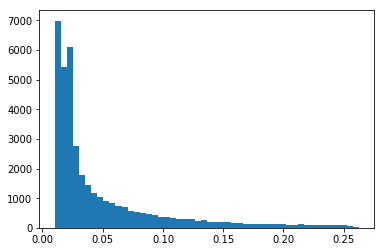

In [21]:
mstddev = H_array[mask].std(axis=0)
mstddev = mstddev[mstddev>0.01]
mxedges, myedges, mpatch = plt.hist(mstddev, bins=50)

In [61]:
import umap
reducer = umap.UMAP()

In [59]:
reducer = umap.UMAP(n_neighbors=5, metric='correlation')
embedding = reducer.fit_transform(H_array)
assert(np.all(embedding == reducer.embedding_))

/Users/MacBookAir/anaconda/lib/python3.5/site-packages/umap/umap_.py:918: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0


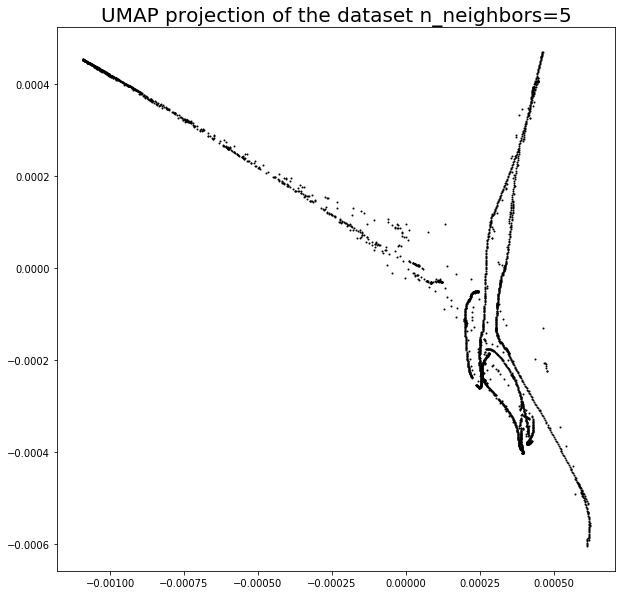

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=2)
plt.title('UMAP projection of the dataset n_neighbors=5', fontsize=20);

In [23]:
reducer = umap.UMAP(n_neighbors=20, metric='correlation',random_state=42)    

In [24]:
embedding = reducer.fit_transform(H_array)
assert(np.all(embedding == reducer.embedding_))

/Users/MacBookAir/anaconda/lib/python3.5/site-packages/umap/umap_.py:918: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0


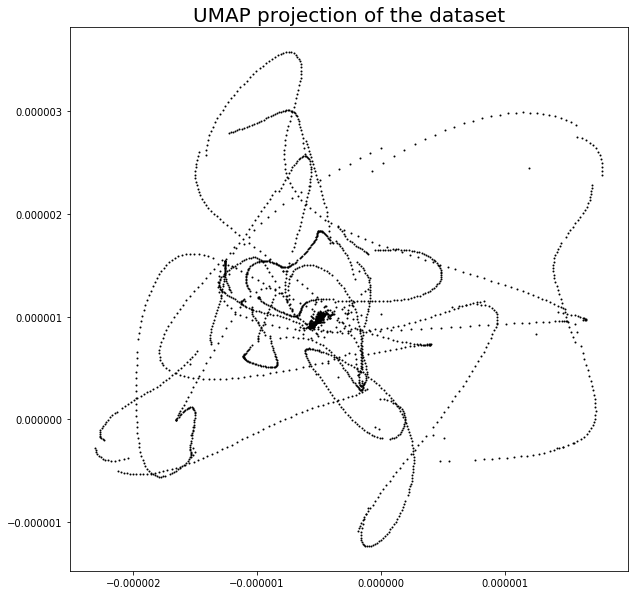

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=2)
plt.title('UMAP projection of the dataset', fontsize=20);

In [26]:
embedding = reducer.fit_transform(H_array[mask])
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

/Users/MacBookAir/anaconda/lib/python3.5/site-packages/umap/umap_.py:918: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0


(2810, 2)

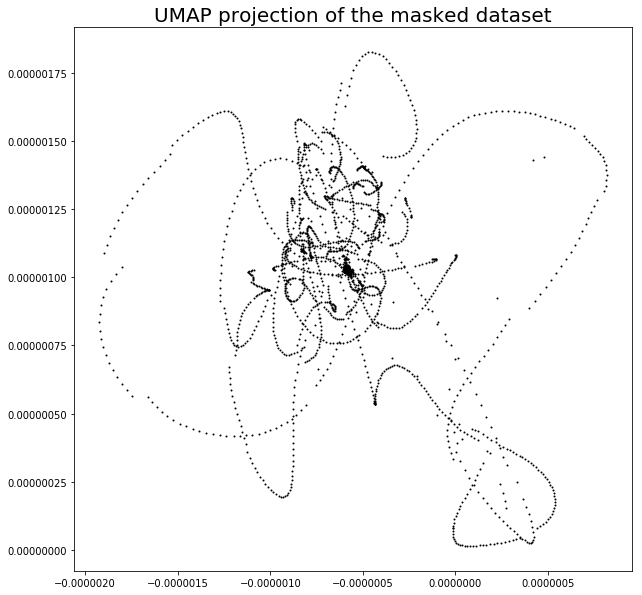

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=2)
plt.title('UMAP projection of the masked dataset', fontsize=20);

[-6e-07, -5.85e-07, 1.014e-06, 1.0225e-06]

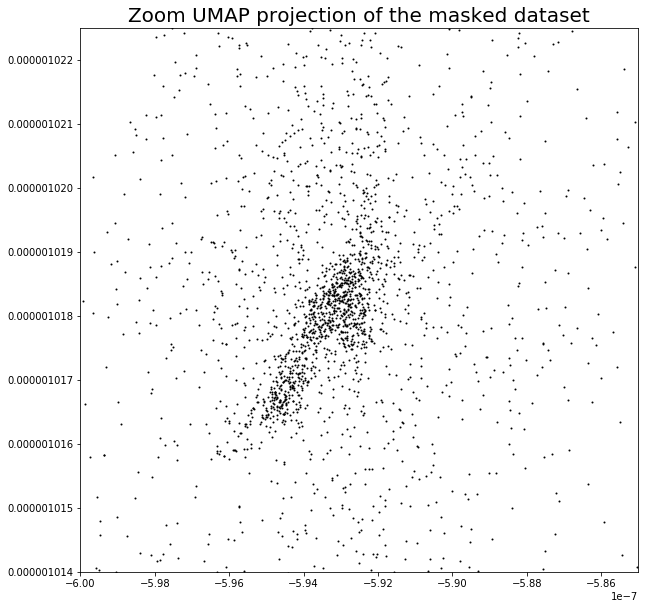

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=2)
plt.title('Zoom UMAP projection of the masked dataset', fontsize=20);
plt.axis([-0.0000006,-0.000000585,0.000001014,0.0000010225])

In [29]:
import gc
gc.collect()

57804

In [54]:
reducer = umap.UMAP(n_neighbors=30, metric='correlation',random_state=42)  
embedding = reducer.fit_transform(H_array[mask])
assert(np.all(embedding == reducer.embedding_))

/Users/MacBookAir/anaconda/lib/python3.5/site-packages/umap/umap_.py:918: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0


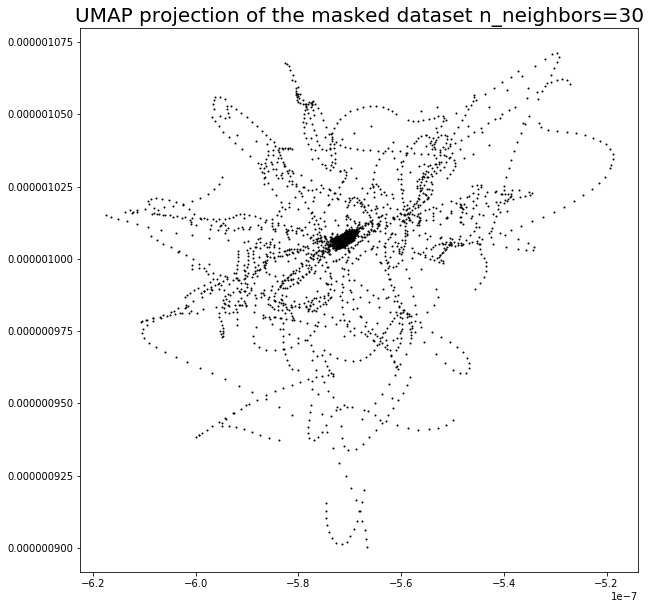

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=2)
plt.title('UMAP projection of the masked dataset n_neighbors=30', fontsize=20);

[-5.8e-07, -5.6e-07, 1e-06, 1.015e-06]

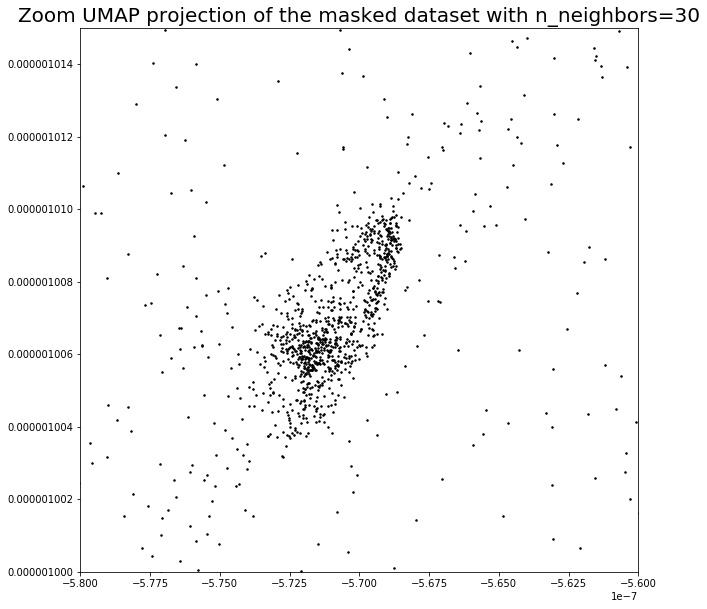

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=3)
plt.title('Zoom UMAP projection of the masked dataset with n_neighbors=30', fontsize=20);
plt.axis([-5.8e-7,-5.6e-7,0.0000010,0.000001015])

In [30]:
reducer = umap.UMAP(n_neighbors=40, metric='correlation',random_state=42)
embedding = reducer.fit_transform(H_array[mask])
assert(np.all(embedding == reducer.embedding_))

/Users/MacBookAir/anaconda/lib/python3.5/site-packages/umap/umap_.py:918: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0


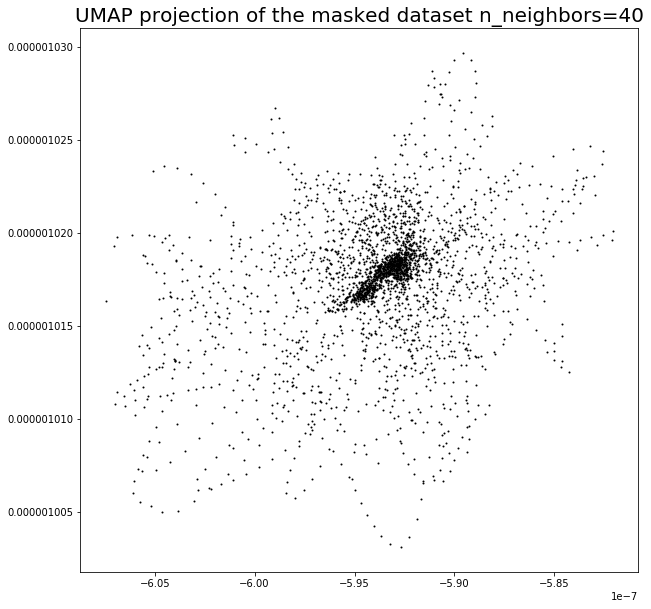

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=2)
plt.title('UMAP projection of the masked dataset n_neighbors=40', fontsize=20);

[-5.97e-07, -5.9e-07, 1.015e-06, 1.02e-06]

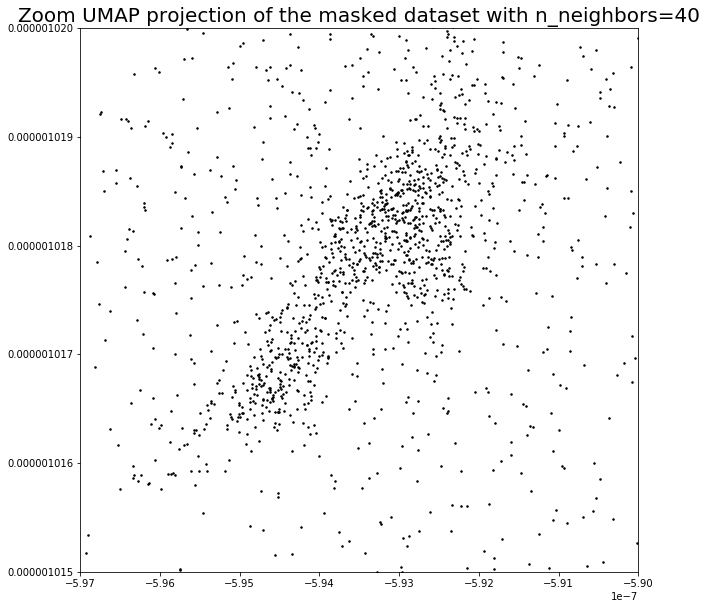

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10),facecolor='w',edgecolor='k')
plt.plot(embedding[:, 0], embedding[:, 1],'k.', ms=3)
plt.title('Zoom UMAP projection of the masked dataset with n_neighbors=40', fontsize=20);
plt.axis([-5.97e-7,-5.90e-7,0.000001015,0.000001020])